In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

file_path = 'diabetes_binary_classification_data.csv'
df = pd.read_csv(file_path)

print(df.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [17]:
# Check if the columns corresponding data type is correct (is either float ot int).
print(df.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [18]:
# Check for missing values
df.isnull().sum()


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [19]:
# Checking for unique values in each column
uniq_vals = df.nunique()
uniq_vals_df = pd.DataFrame(uniq_vals, columns=['Unique Value Count'])

print(uniq_vals_df)


                      Unique Value Count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8


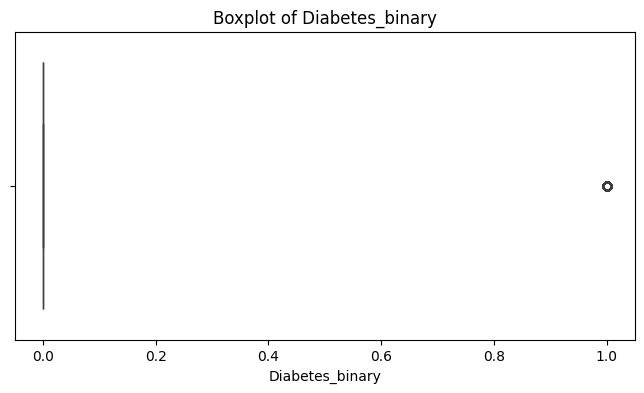

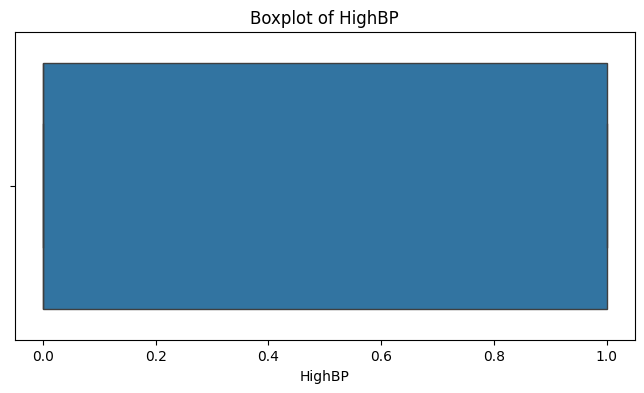

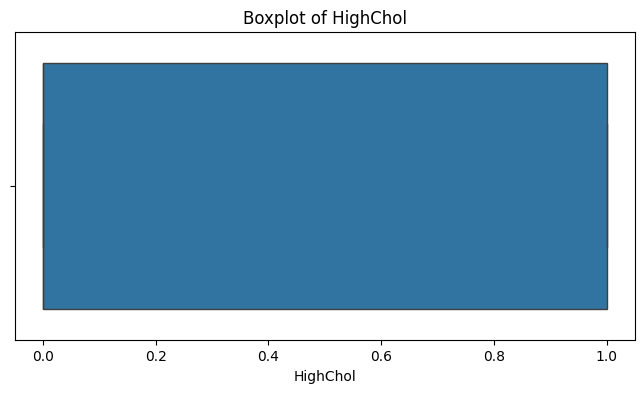

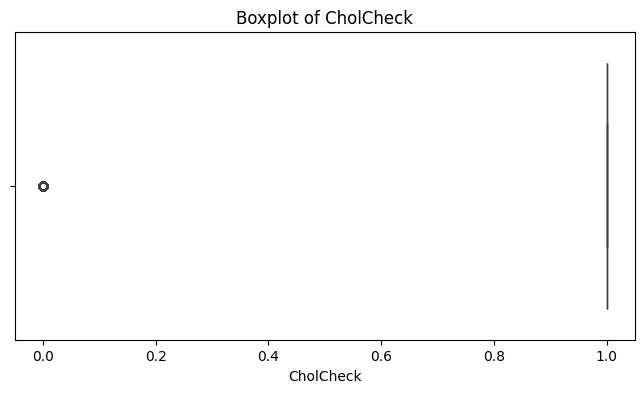

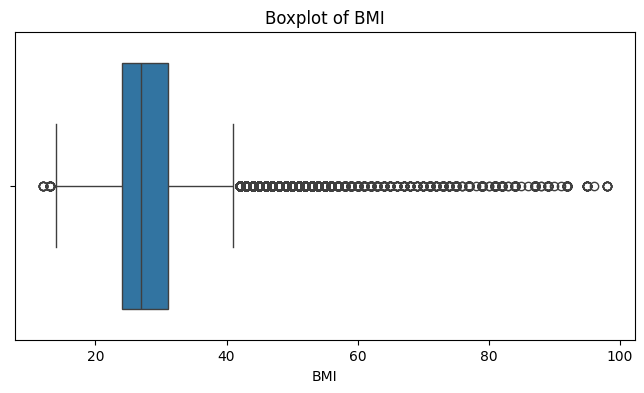

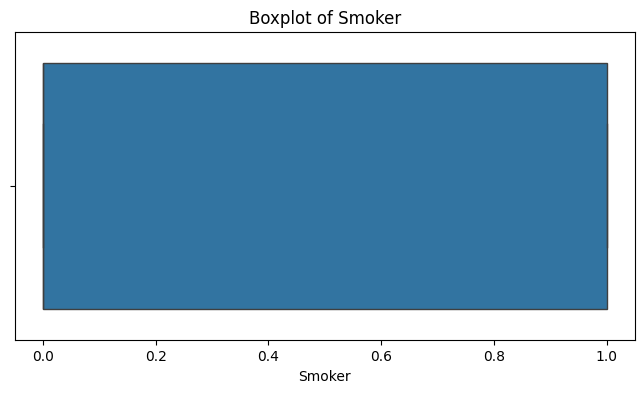

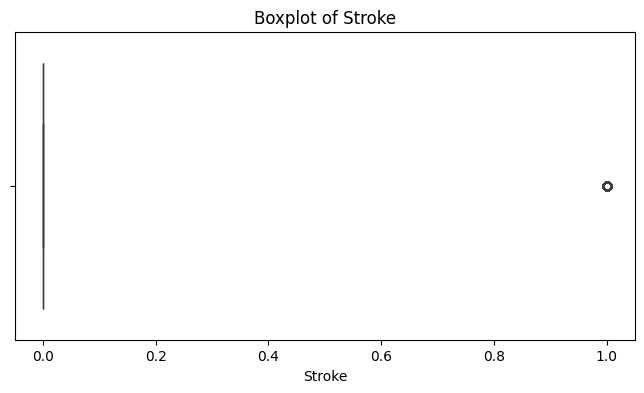

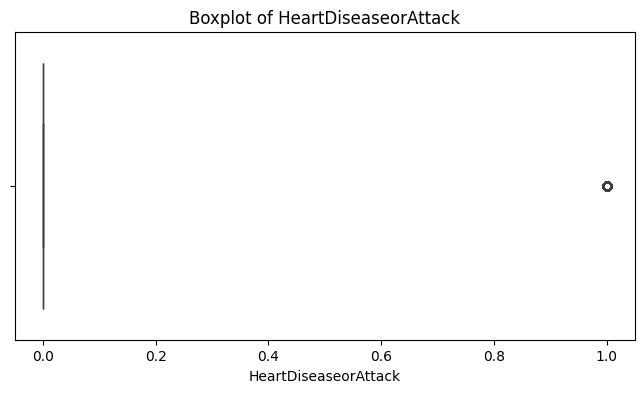

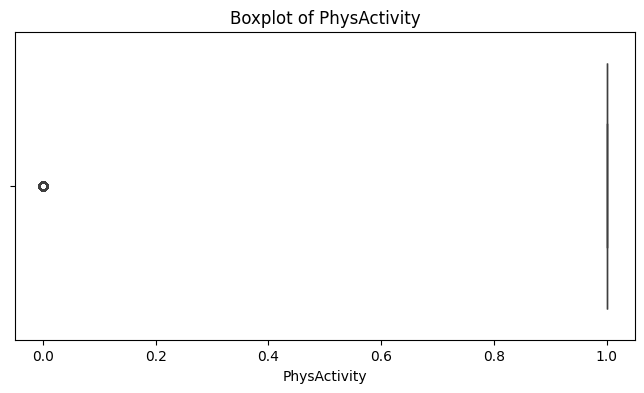

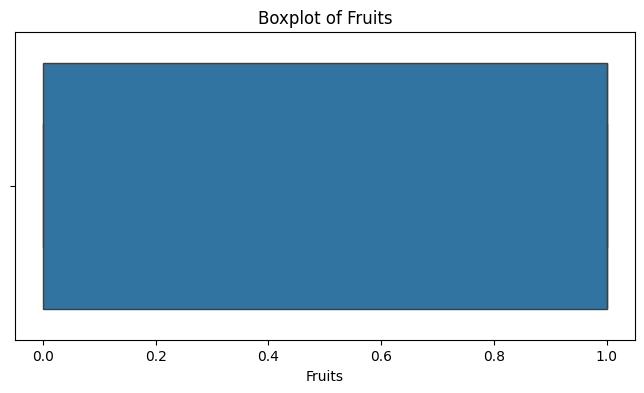

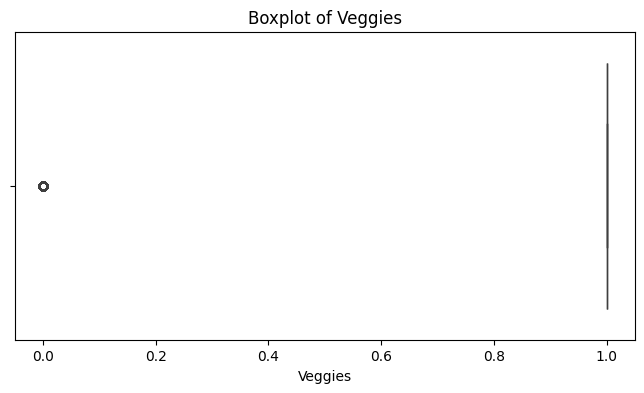

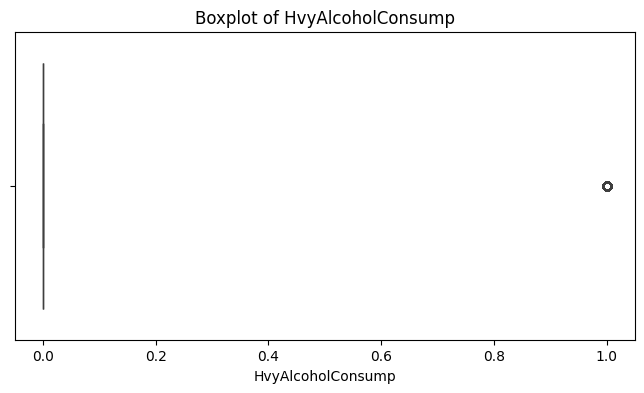

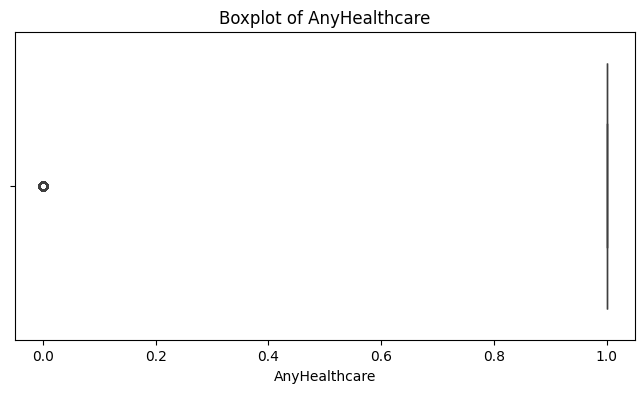

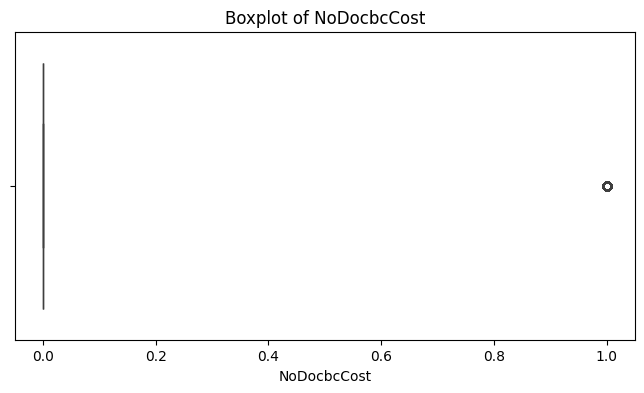

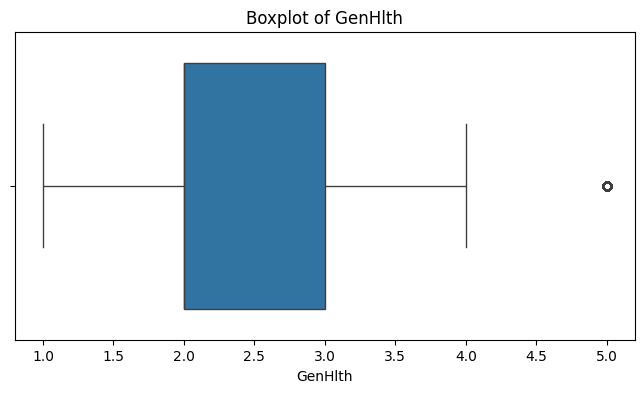

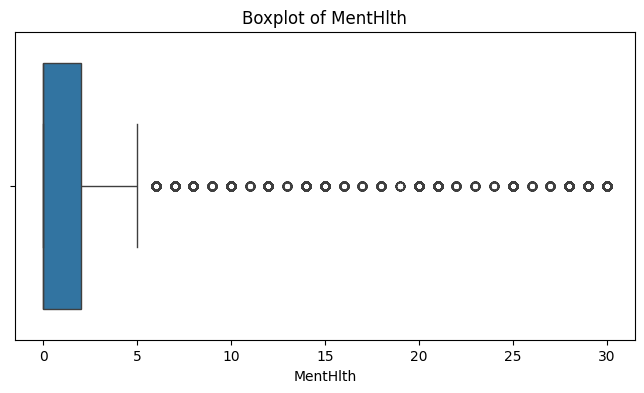

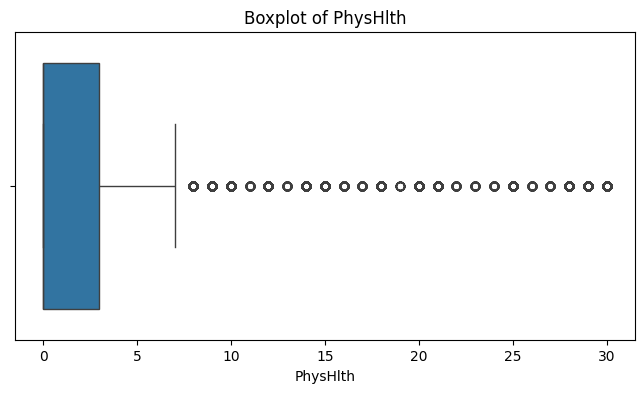

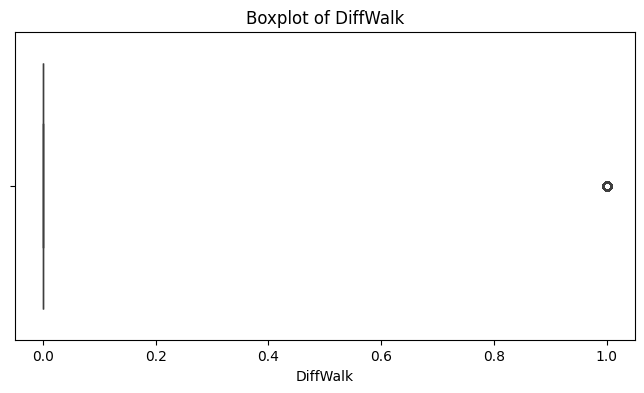

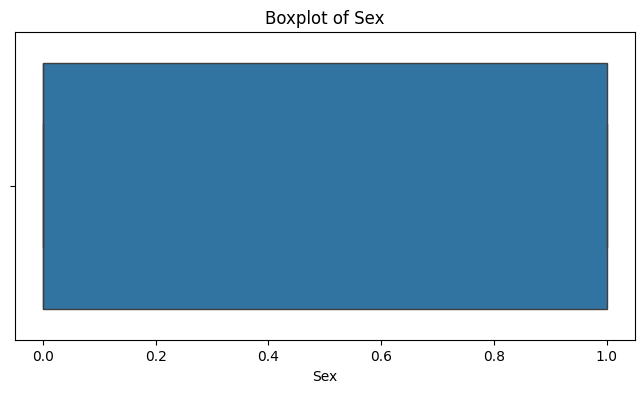

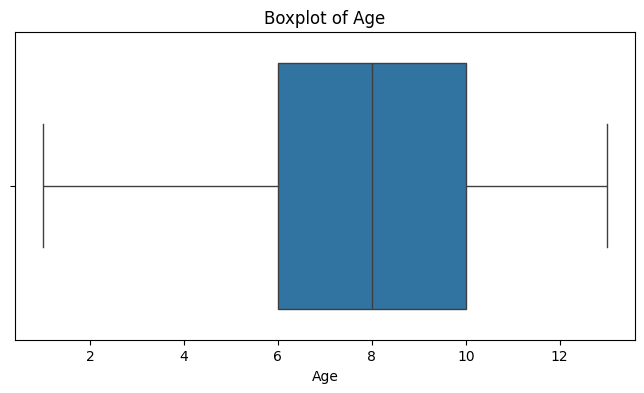

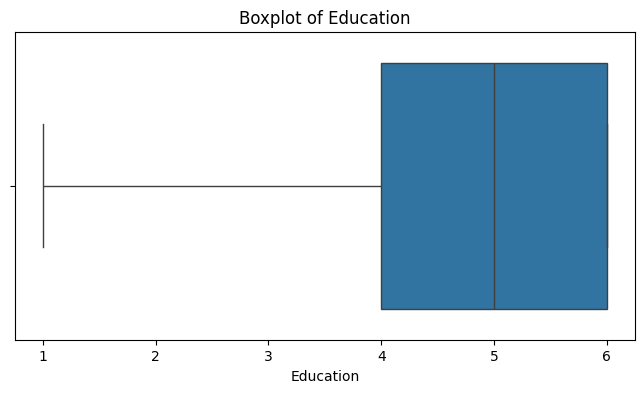

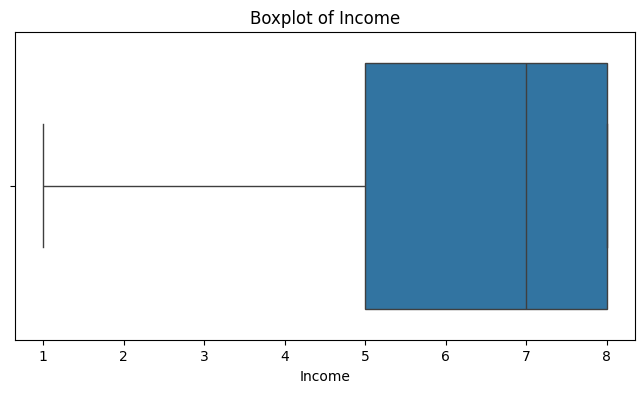

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [21]:
# So now we can see that there are outliers in the columns 'BMI', 'PhysHlth' and 'MentHlth'.
# Now we will remove the outliers from these columns.

low = .1
high = .9

quantile_df = df.quantile([low, high])
df = df[(df["BMI"] > quantile_df.loc[low, "BMI"]) & (df["BMI"] < quantile_df.loc[high, "BMI"])]
df = df[(df["MentHlth"] > quantile_df.loc[low, "MentHlth"]) & (df["MentHlth"] < quantile_df.loc[high, "MentHlth"])]
df = df[(df["PhysHlth"] > quantile_df.loc[low, "PhysHlth"]) & (df["PhysHlth"] < quantile_df.loc[high, "PhysHlth"])]


Text(0.5, 1.0, 'Correlation map')

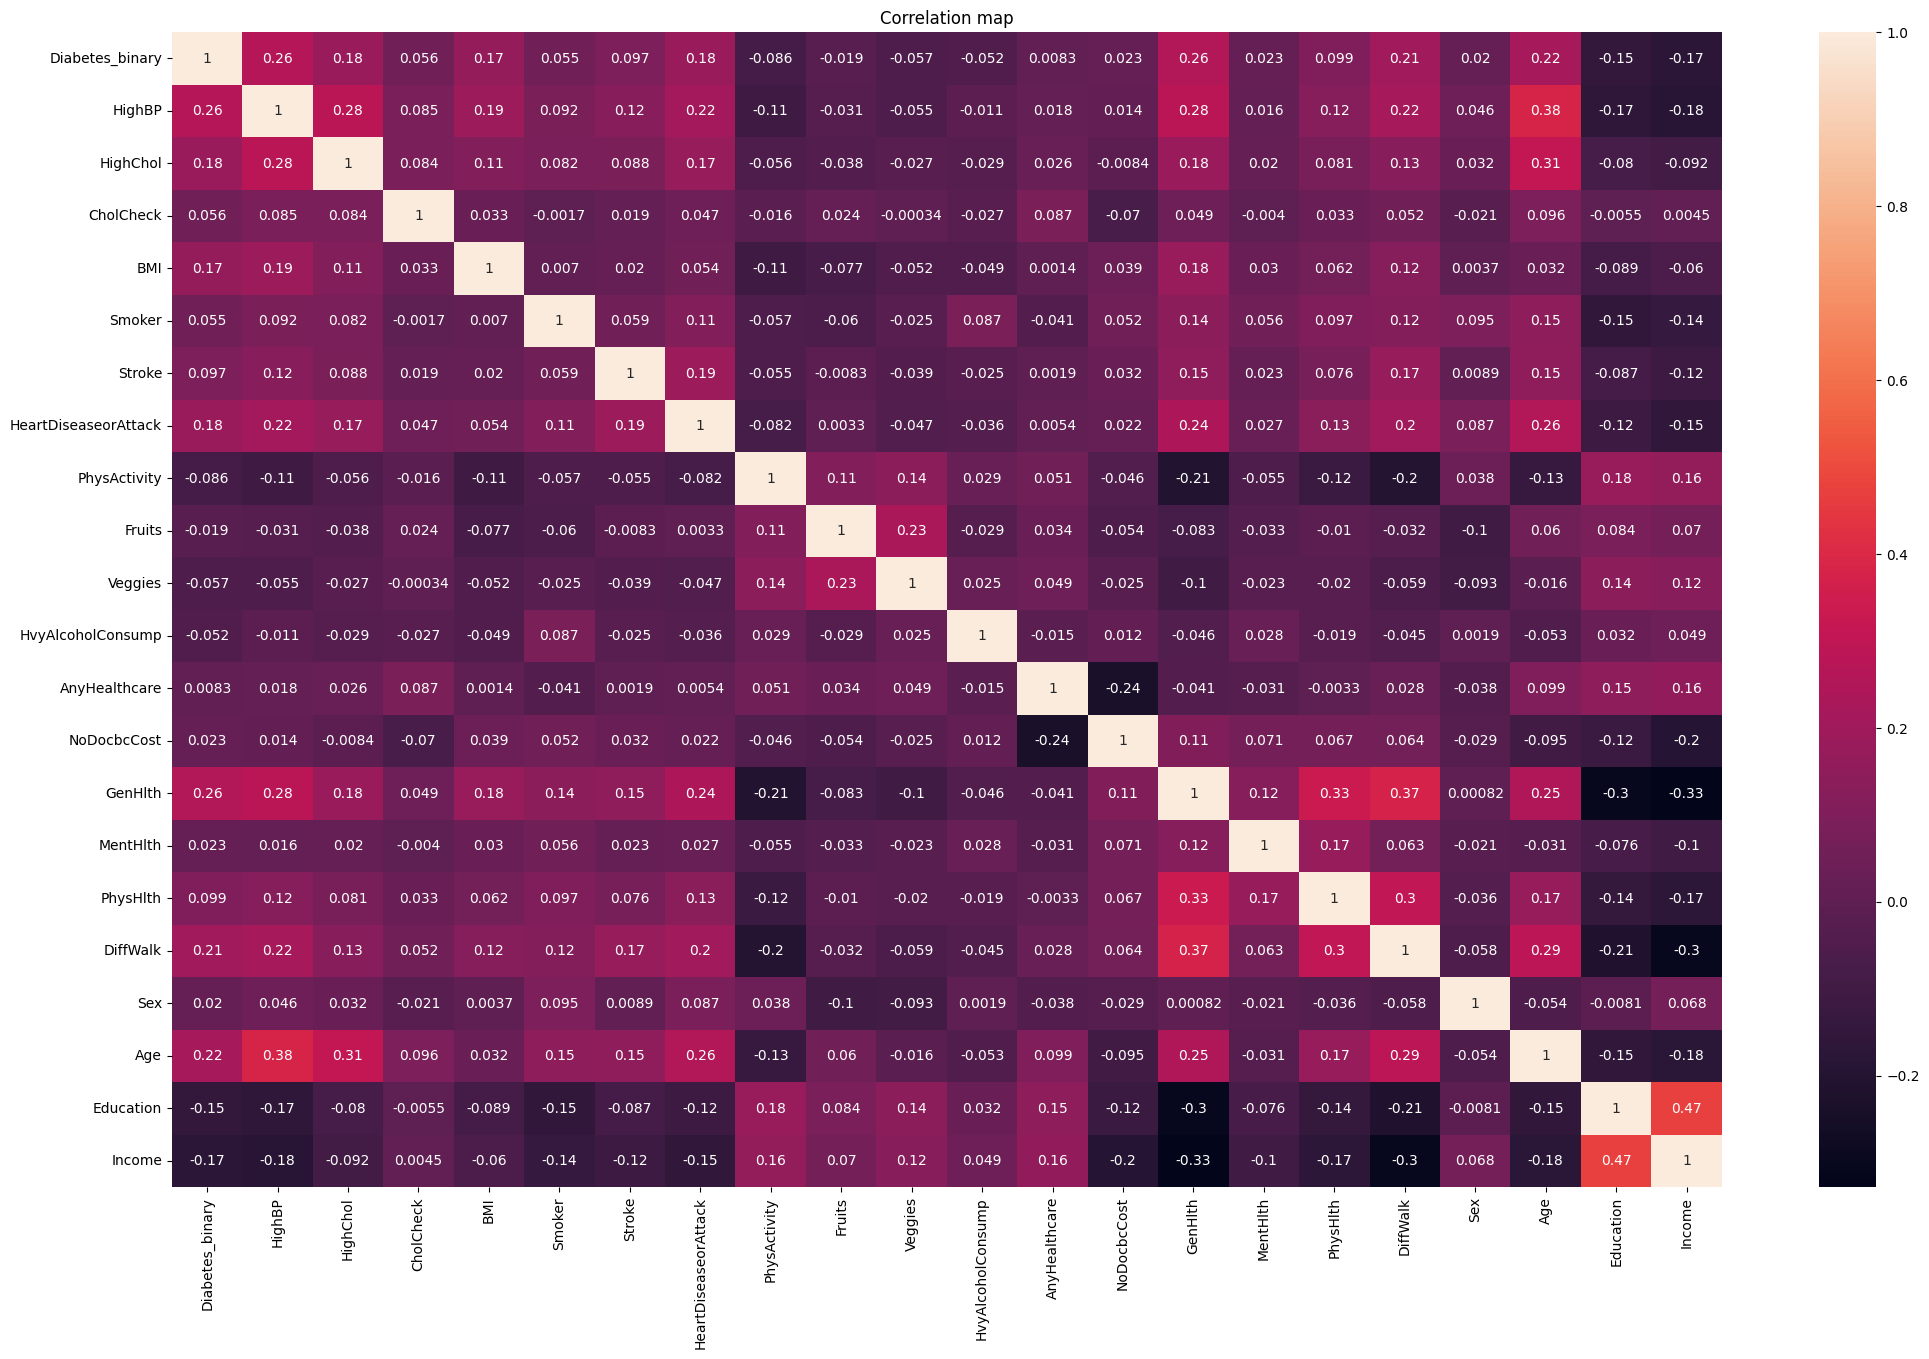

In [22]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation map")

NameError: name 'df2' is not defined

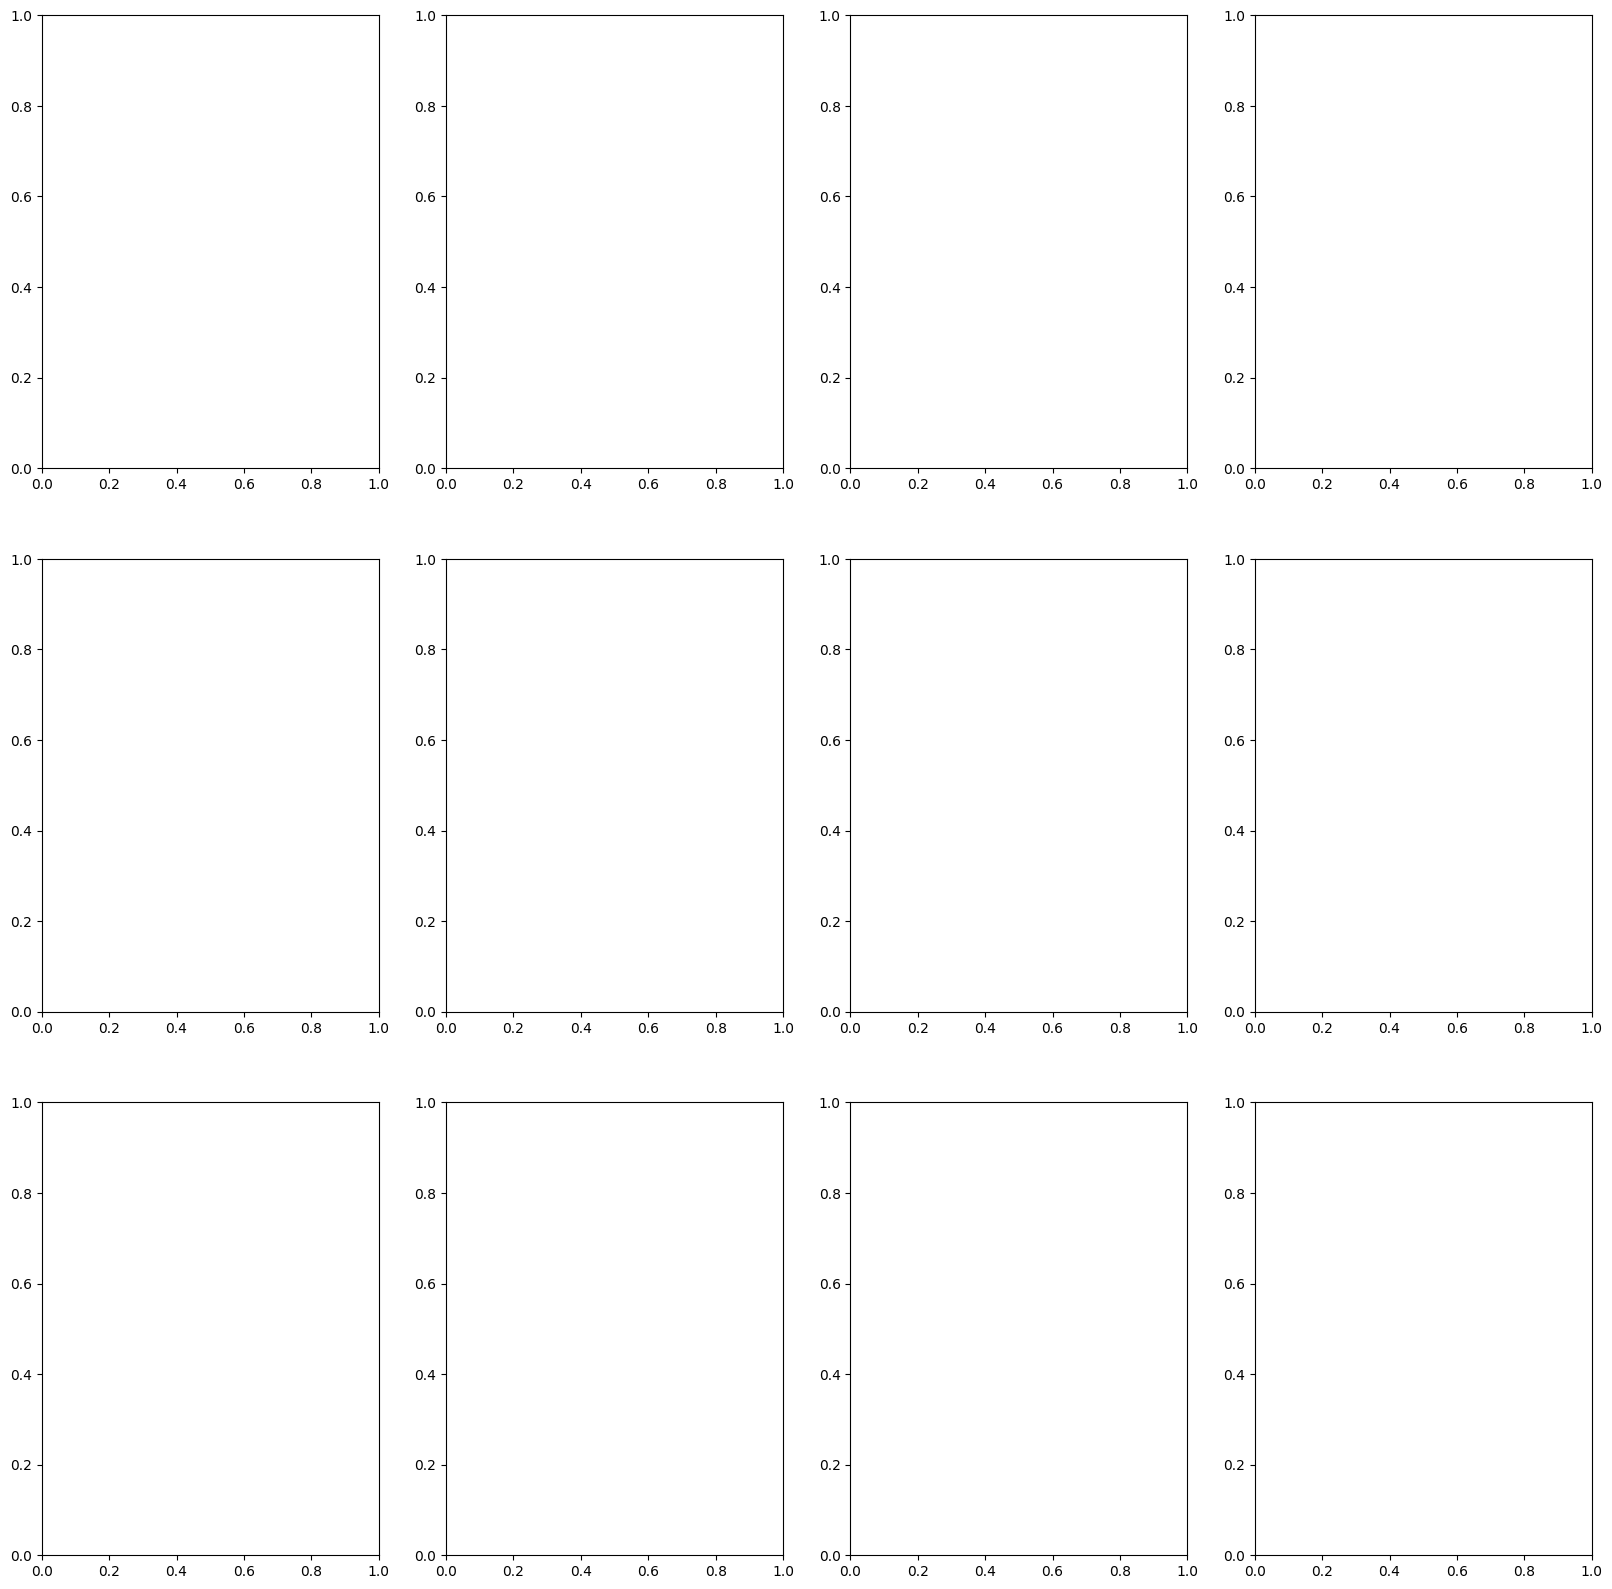

In [8]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_plot_pivot(df2, x_column):
    df_plot = df2.groupby([x_column, 'Diabetes_binary']).size().reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return df_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df2, cols[i]).plot(kind='bar', stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()


In [9]:
# Convert 'Diabetes_binary' into binary classification (0 = no diabetes, 1 = prediabetes or diabetes)
df['Diabetes_binary'] = df['Diabetes_binary'].apply(lambda x: 1 if x >= 1 else 0)

# Handle categorical variables (most are already numerical, no need for additional encoding)

# Separate features and target variable
X = df.drop('Diabetes_binary', axis=1)  # Features
y = df['Diabetes_binary']               # Target

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (especially for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Importance using RFE (Recursive Feature Elimination)
model_lr = LogisticRegression(max_iter=1000)
rfe = RFE(model_lr, n_features_to_select=5)  # Select the top 5 most important features
rfe = rfe.fit(X_train_scaled, y_train)

# Get the ranking of features
print(f'RFE Ranking of Features: {rfe.ranking_}')

# Train various models and compare them
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()

# Train the models and predict
models = {'Logistic Regression': log_reg, 
          'Decision Tree': decision_tree, 
          'Random Forest': random_forest, 
          'Gradient Boosting': gradient_boost}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'\nModel: {name}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall (minimize false negatives): {recall:.4f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Feature importance from Random Forest
importances = random_forest.feature_importances_
feature_importance = pd.Series(importances, index=df.drop('Diabetes_binary', axis=1).columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("\nFeature Importance from Random Forest:\n", feature_importance)


RFE Ranking of Features: [ 1  1  2  1 12 16  7 13  9 10  4 15 14  1 17  8  6  5  1 11  3]

Model: Logistic Regression
Confusion Matrix:
[[3424   47]
 [ 473   59]]
Accuracy: 0.8701
Recall (minimize false negatives): 0.1109
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3471
           1       0.56      0.11      0.18       532

    accuracy                           0.87      4003
   macro avg       0.72      0.55      0.56      4003
weighted avg       0.84      0.87      0.83      4003


Model: Decision Tree
Confusion Matrix:
[[3006  465]
 [ 374  158]]
Accuracy: 0.7904
Recall (minimize false negatives): 0.2970
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3471
           1       0.25      0.30      0.27       532

    accuracy                           0.79      4003
   macro avg       0.57      0.58      0.58      4003
weighte